In [199]:
import pandas as pd

In [200]:
#Reading the CSV data Files
df=pd.read_csv("Country-data.csv")

In [201]:
#Displaying the first 5 rows of the dataset
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [202]:
#Displaying the last 5 rows of the dataset
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [203]:
#Displaying the shape of the dataset
shapee=df.shape
print("There are {} rows and  {} columns".format(shapee[0],shapee[1]))

There are 167 rows and  10 columns


In [204]:
#Textual summary
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [205]:
#Not-null analysis Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### We conclude there the no null values in the dataset
### Now we need to convert the percentage value of Export, Health and import to real values by *gdp/100

In [206]:
#conversion of percentage per capita
df['exports']=df['exports']*df['gdpp']/100
df['health']=df['health']*df['gdpp']/100
df['imports']=df['imports']*df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Univariate and Bivariate analysis

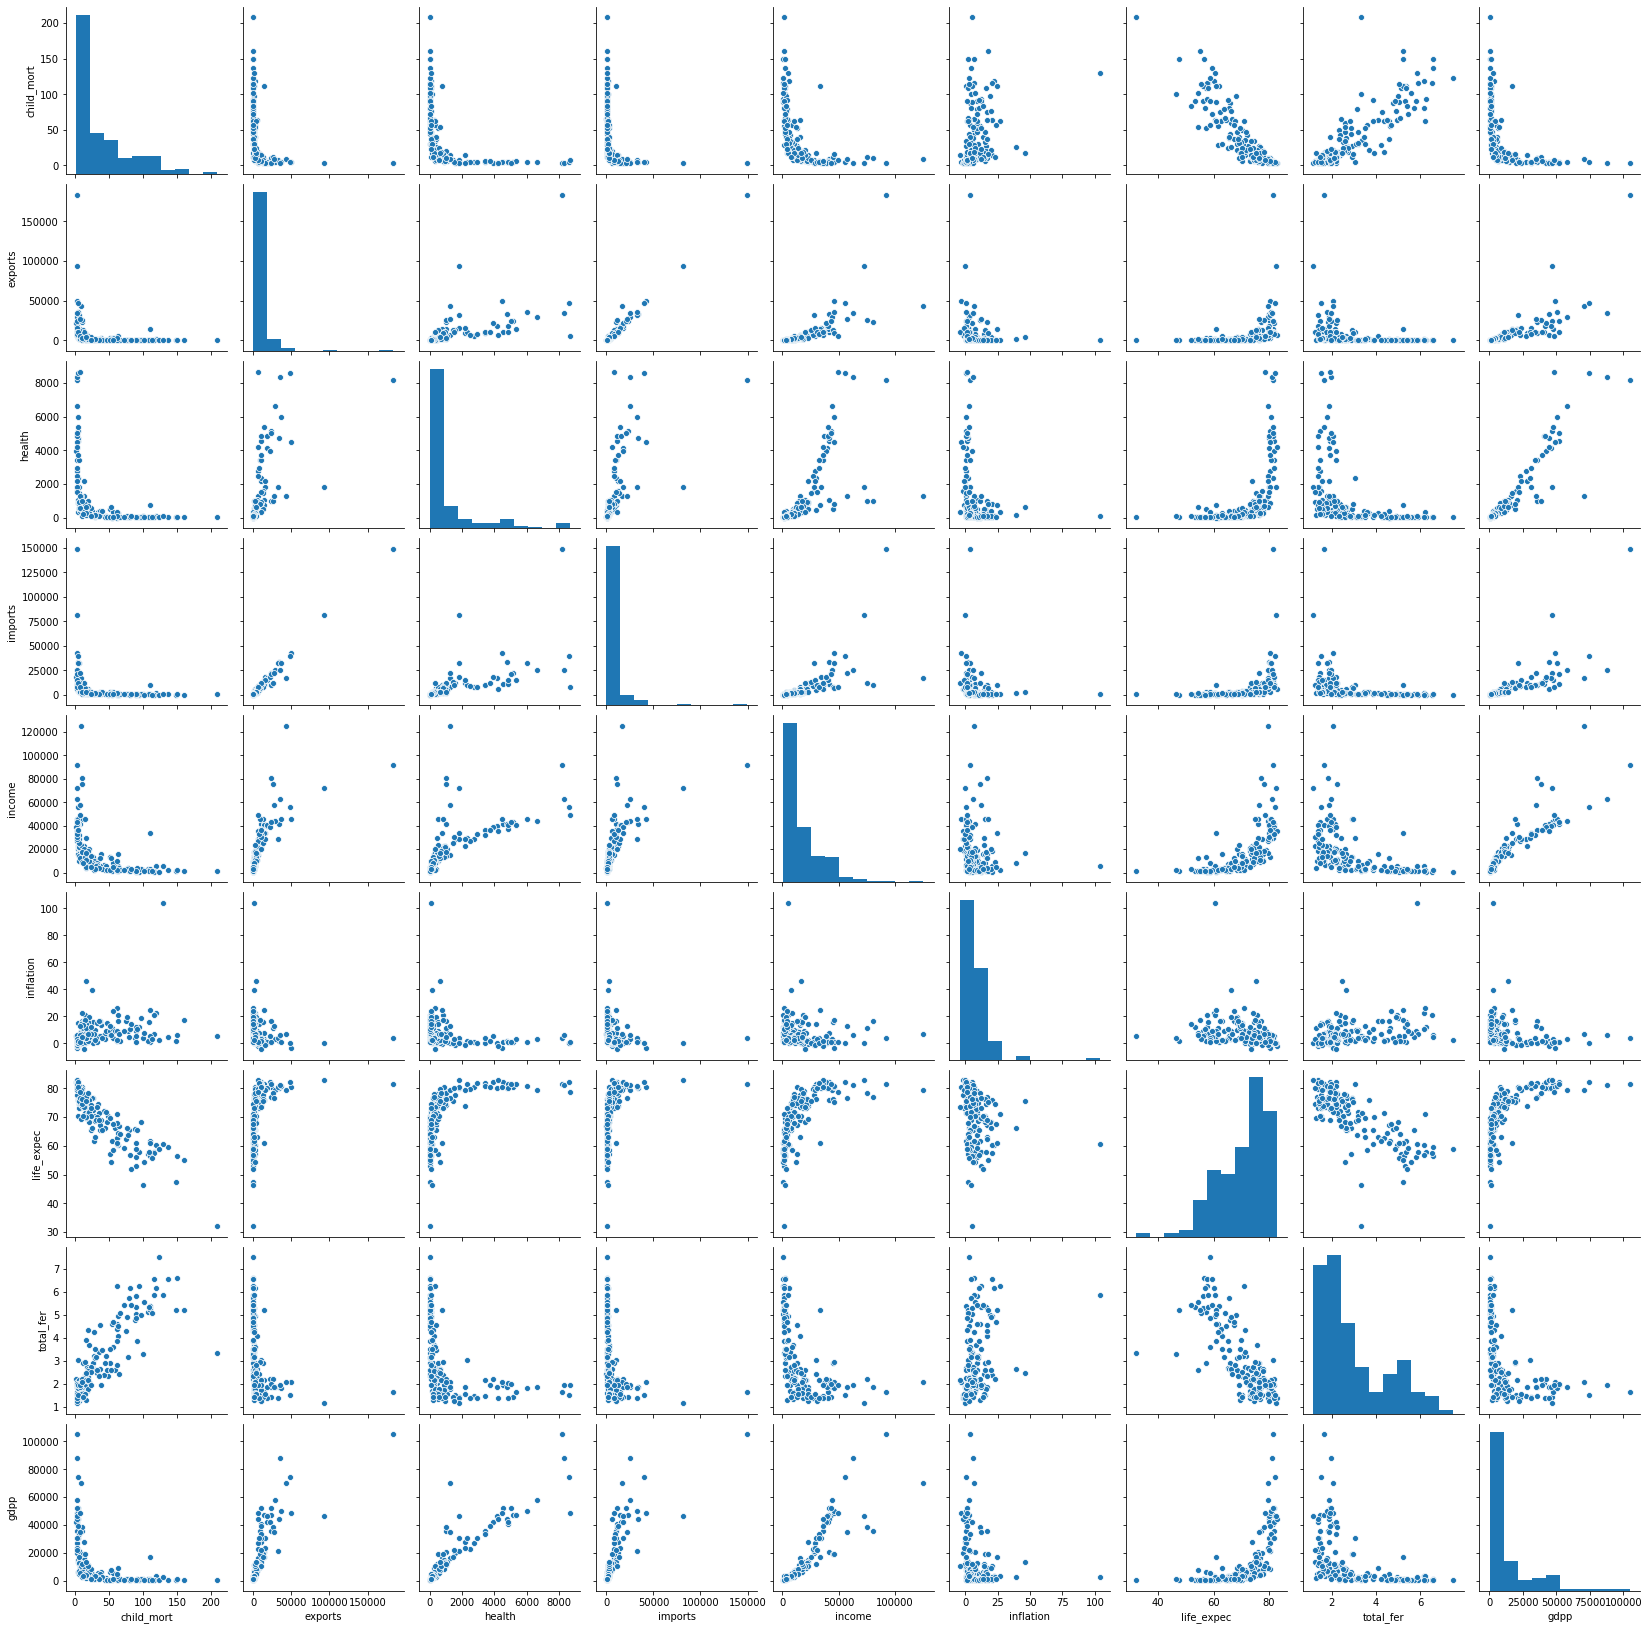

In [207]:
import seaborn as sns
sns.pairplot(df)

### Outlier Analyis

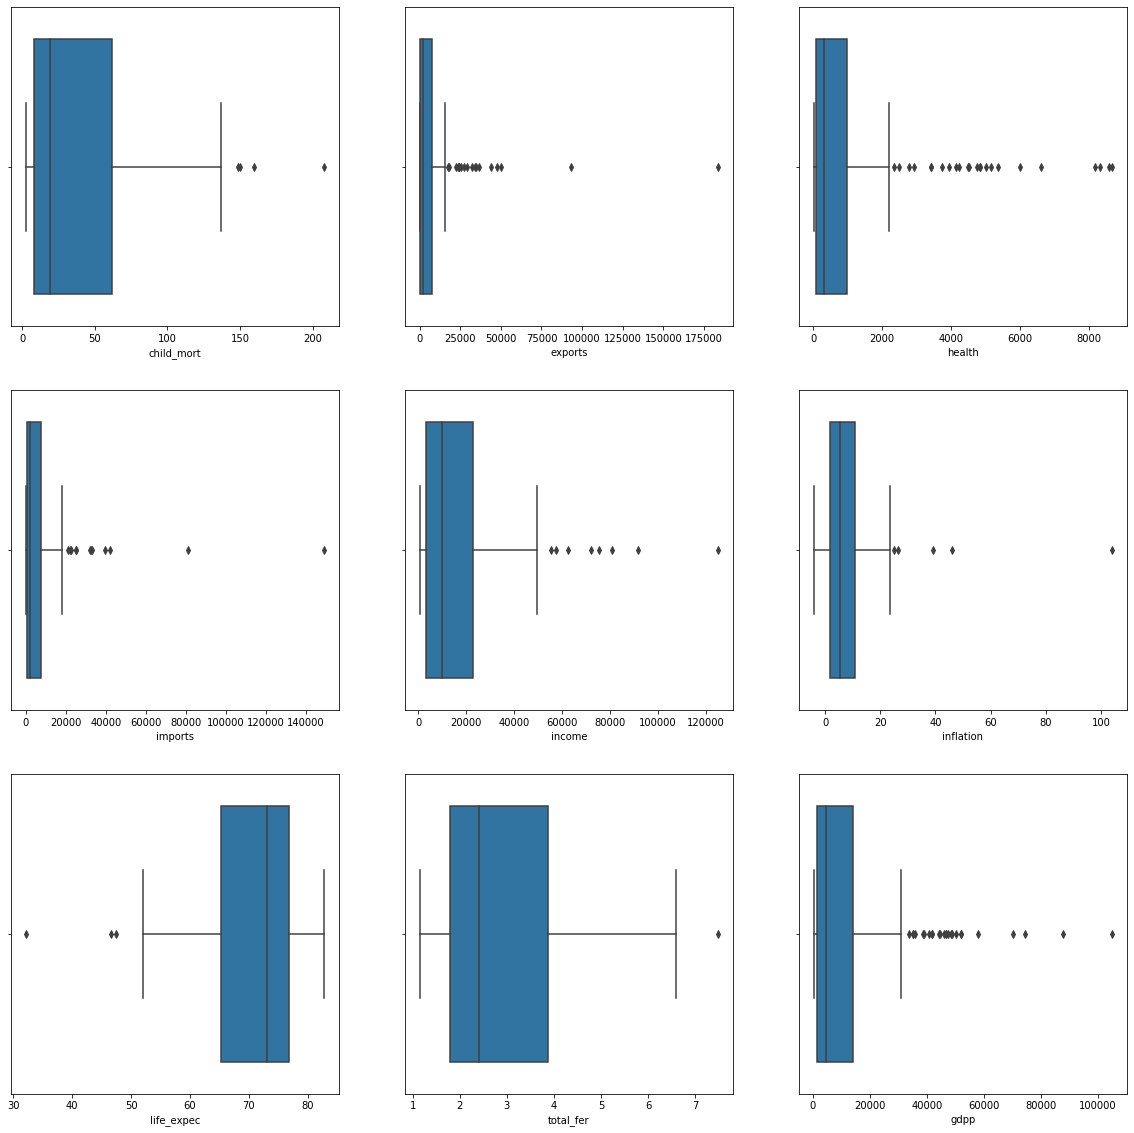

In [208]:
#Plotting Boxplot to analyse the Outliers
import matplotlib.pyplot as plt
features=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize=(20,20))
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(df[i[1]])



### Removing the outliers

In [209]:
#df1- is the data frame without outliers
df1=df 
df1=df1[(df1['exports']<75000)]
df1=df1[(df1['imports']<60000)]
df1=df1[(df1['inflation']<50)]
df1=df1[(df1['income']<1000000)]
df1=df1[(df1['gdpp']<65000)] 
df1=df1[(df1['health']<8500)]
df1.shape

(160, 10)

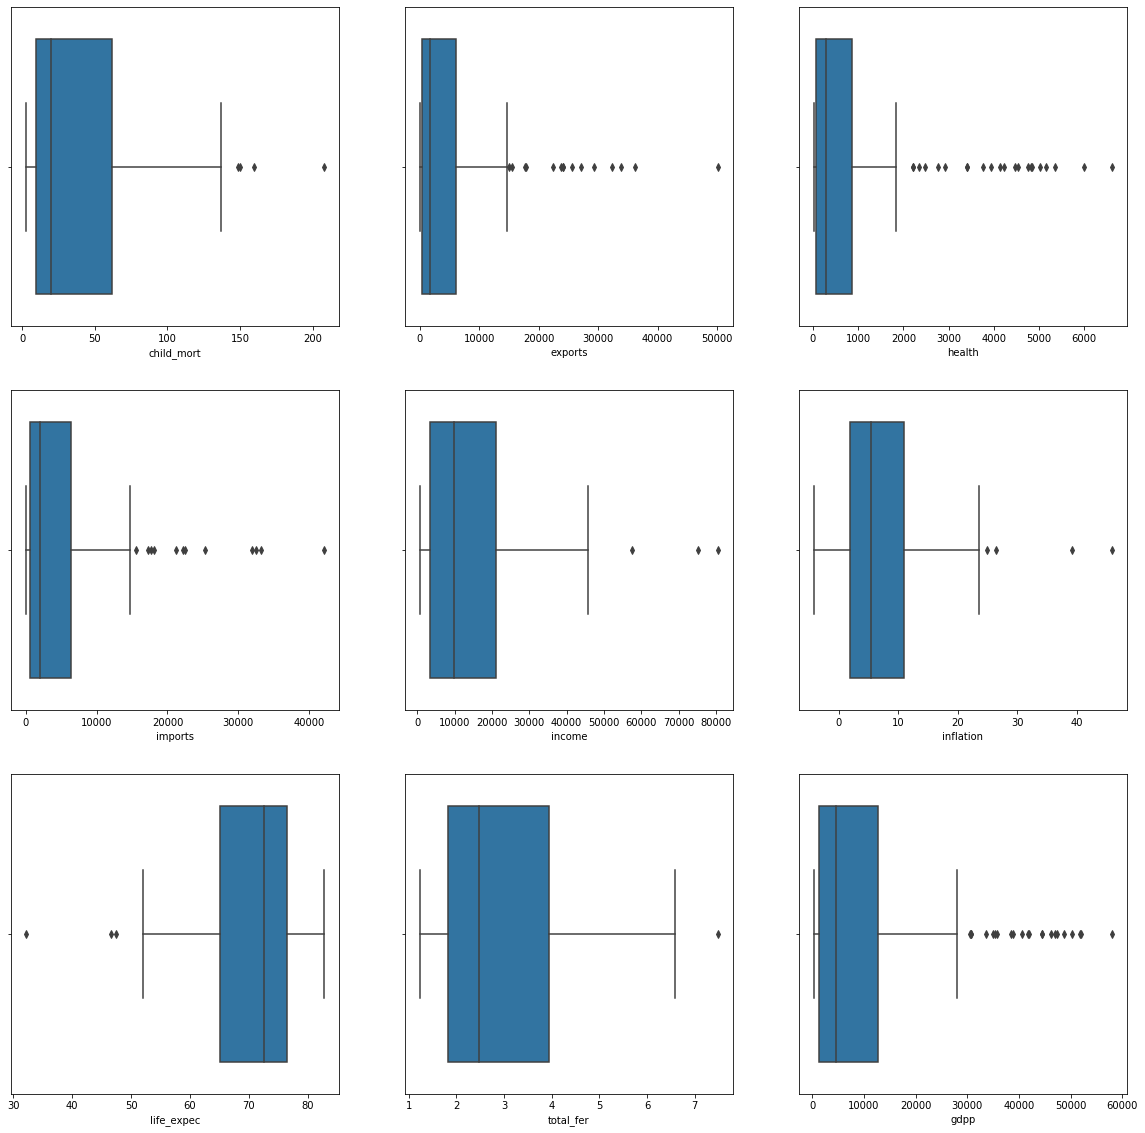

In [210]:
import matplotlib.pyplot as plt
features=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize=(20,20))
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(df1[i[1]])

### Quantifying the association of features and accidents
Thresholds<br/>
0.2= Weak<br/>
0.5=medium<br/>
0.8=strong<br/>
0.9=very strong<br/>

In [211]:
#The Coorelation between the features
corr=df1.corr()

In [212]:
corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.427692,-0.453271,-0.462150,-0.570745,0.221440,-0.886570,0.841141,-0.515904
exports,-0.427692,1.000000,0.767610,0.971706,0.835404,-0.222122,0.508828,-0.399066,0.849939
health,-0.453271,0.767610,1.000000,0.812093,0.728200,-0.337356,0.567959,-0.428336,0.949764
imports,-0.462150,0.971706,0.812093,1.000000,0.766427,-0.314199,0.539399,-0.439637,0.850080
income,-0.570745,0.835404,0.728200,0.766427,1.000000,-0.142608,0.642889,-0.543054,0.888657
inflation,0.221440,-0.222122,-0.337356,-0.314199,-0.142608,1.000000,-0.234931,0.290114,-0.280153
life_expec,-0.886570,0.508828,0.567959,0.539399,0.642889,-0.234931,1.000000,-0.751977,0.625787
total_fer,0.841141,-0.399066,-0.428336,-0.439637,-0.543054,0.290114,-0.751977,1.000000,-0.481820
gdpp,-0.515904,0.849939,0.949764,0.850080,0.888657,-0.280153,0.625787,-0.481820,1.000000


## Fitting multivariate Linear Regressor

In [213]:
from sklearn import linear_model

In [214]:
features=df1.drop(['country','child_mort',],axis=1)

In [215]:
target=df1['child_mort']

In [216]:
reg=linear_model.LinearRegression()
reg.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
fit_coef=reg.coef_
fit_coef

array([ 8.10520380e-04,  1.92501942e-03, -1.01862914e-03, -1.77755067e-04,
       -1.45766800e-01, -2.80208398e+00,  1.04344989e+01,  1.71592994e-04])

### PRINCIPAL COMPONENT ANALYSIS

In [218]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scaled=scaler.fit_transform(features)

In [219]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(feature_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [220]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Variance Ratio')

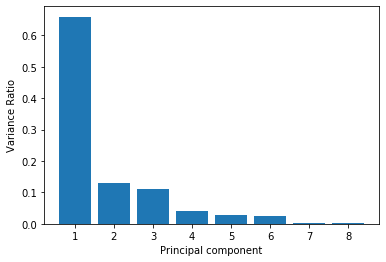

In [221]:
plt.bar(range(1,pca.n_components_+1),pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Variance Ratio')

In [222]:
#Calculating Cumulative variance of first 4 features
cumulative_variance=pca.explained_variance_ratio_.cumsum()[3]
print("The cumulative variance of the first 4 principal components is {}".format(round(cumulative_variance,5)))

The cumulative variance of the first 4 principal components is 0.94358


### The Above PCA states that almost 94.35% of the data is explained by first 4 components </br>

# Kmeans Clustering :-

In [224]:
from sklearn.cluster import KMeans

[1280.0, 658.4070210742607, 468.79941277156, 387.06504140186047, 324.88671978121477, 282.5290703960286, 252.2069507787591, 225.11757197924175, 206.55946501298092]
range(1, 10)


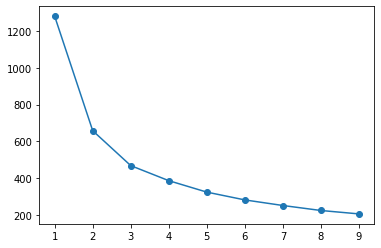

In [225]:
#Plotting the inertia with different K values 
ks=range(1,10)
inertias=[]
for k in ks:
    km=KMeans(n_clusters=k,random_state=8)
    km.fit(feature_scaled)
    inertias.append(km.inertia_)
print(inertias)
print(ks)
plt.plot(ks,inertias,marker='o')
    

In [226]:
#initializing the KMeans model
km=KMeans(n_clusters=3,random_state=8)
#fitting the model
km.fit(feature_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=8, tol=0.0001, verbose=0)

In [228]:
df_with_cluster=df1
#Adding the Cluster labels to the dataset
df_with_cluster['cluster']=km.labels_

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [263]:
#Assigning different data according to thier cluster
cluster0=df_with_cluster[(df_with_cluster['cluster']==0)]
cluster1=df_with_cluster[(df_with_cluster['cluster']==1)]
cluster2=df_with_cluster[(df_with_cluster['cluster']==2)]

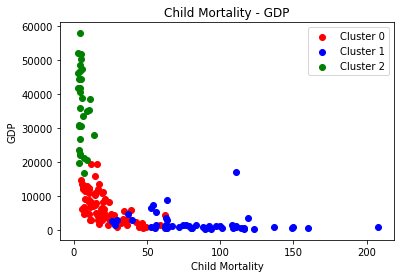

In [278]:
#Plotting Child Mortality vs GDP Scatter plot
plt.scatter(cluster0['child_mort'],cluster0['gdpp'],c='red',label='Cluster 0')
plt.scatter(cluster1['child_mort'],cluster1['gdpp'],c='blue',label='Cluster 1')
plt.scatter(cluster2['child_mort'],cluster2['gdpp'],c='green',label='Cluster 2')
plt.xlabel("Child Mortality")
plt.ylabel("GDP")
plt.title('Child Mortality - GDP')
plt.legend(loc='upper right')
plt.show()

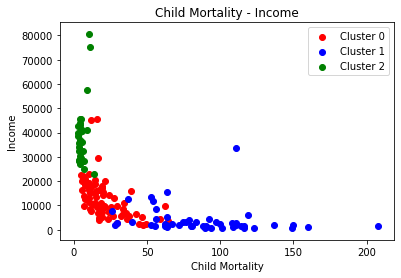

In [277]:
#Plotting Child Mortality vs Income Scatter plot
plt.scatter(cluster0['child_mort'],cluster0['income'],c='red',label='Cluster 0')
plt.scatter(cluster1['child_mort'],cluster1['income'],c='blue',label='Cluster 1')
plt.scatter(cluster2['child_mort'],cluster2['income'],c='green',label='Cluster 2')
plt.xlabel("Child Mortality")
plt.ylabel("Income")
plt.title('Child Mortality - Income')
plt.legend(loc='upper right')
plt.show()

#### As we can interpret from both of the scatter plot that</BR>
<li>Lower the GDP of the Country Higher is the Child Mortality</li>
<li>Lower the Income of the Country Higher is the Child Mortality</li>

In [162]:
df1=df1.drop('cluster', axis=1)

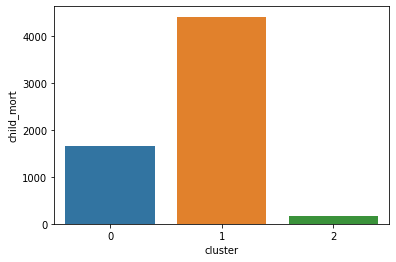

In [163]:
#Plotting the Cluster of countries with respect to child mortality 
sns.barplot(x="cluster",y="child_mort",data=df_with_cluster,estimator=sum,ci=None)

In [164]:
#Calculating the count , mean and  sum :-
count_mean_sum=df_with_cluster.groupby('cluster')['child_mort'].agg(['count','mean','sum'])
count_mean_sum

,count,mean,sum
cluster,,,
0,78,21.183333,1652.3
1,51,86.568627,4415.0
2,31,5.296774,164.2


In [165]:
import numpy as np

In [303]:
#Printing the countries  in cluster 1 
print('There are {} countries which needs more attention by the NGO \nThey are as follows-\n'.format(cluster1.shape[0]))
cluster1['country']

There are 51 countries which needs more attention by the NGO 
They are as follows-



0                   Afghanistan
3                        Angola
17                        Benin
21                     Botswana
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
72                         Iraq
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
101     

### The 5 countries that are in the direst need of aid are :-</br>
##### (KMeans Clustering)

In [325]:
cluster1_sort_child_mort_GDP=cluster1.sort_values(['child_mort','gdpp'],ascending=(False,True))
print(cluster1_sort_child_mort_GDP['country'].head())

66                        Haiti
132                Sierra Leone
32                         Chad
31     Central African Republic
97                         Mali
Name: country, dtype: object


# Hierarchical clustering

In [419]:
#Importing necessary modules
from scipy.cluster.hierarchy import linkage, dendrogram

In [420]:
#Scaling the dataset
df2=df1.drop(['cluster'],axis=1)
df_scaled=scaler.fit_transform(df2.drop(['country'],axis=1))

In [421]:
col_name_list=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

In [422]:
df_scaled=pd.DataFrame(df_scaled,columns=col_name_list)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.284352,-0.629224,-0.592529,-0.654185,-0.892764,0.276157,-1.596559,1.890185,-0.732722
1,-0.559990,-0.495485,-0.431215,-0.408406,-0.338558,-0.380895,0.690640,-0.881654,-0.480111
2,-0.291859,-0.425856,-0.489688,-0.491390,-0.140722,1.160189,0.713399,-0.057414,-0.453685
3,2.006051,-0.366153,-0.550635,-0.475292,-0.607002,1.996437,-1.152774,2.116186,-0.520106
4,-0.717862,0.045137,-0.097300,0.326067,0.272269,-0.785745,0.747536,-0.562593,0.099102


# Hierarchical clustering-Complete Linkage

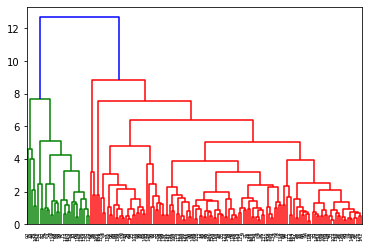

In [409]:
#Plotting the dendogram with complete Linkage
merging=linkage(df_scaled,method='complete')
dendrogram(merging)
plt.show()

In [424]:
#clustering
from scipy.cluster.hierarchy import cut_tree
clusterCut=list(cut_tree(merging,n_clusters=3).reshape(-1,))

In [425]:
#Adding Cluster label to dataset
df_with_hierarchy_cluster=df2
df_with_hierarchy_cluster['cluster']=clusterCut

In [430]:
df_with_hierarchy_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


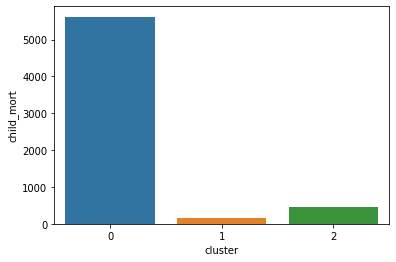

In [431]:
#Plotting the Cluster of countries with respect to child mortality 
sns.barplot(x="cluster",y="child_mort",data=df_with_hierarchy_cluster,estimator=sum,ci=None)

In [432]:
count_mean_sum2=df_with_hierarchy_cluster.groupby('cluster')['child_mort'].agg(['count','mean','sum'])
count_mean_sum2

,count,mean,sum
cluster,,,
0,127,44.245669,5619.2
1,30,5.186667,155.6
2,3,152.233333,456.7


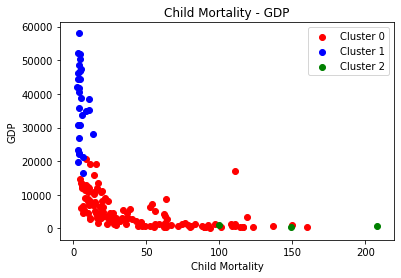

In [433]:
#Assigning different data according to thier cluster
h_cluster0=df_with_hierarchy_cluster[(df_with_hierarchy_cluster['cluster']==0)]
h_cluster1=df_with_hierarchy_cluster[(df_with_hierarchy_cluster['cluster']==1)]
h_cluster2=df_with_hierarchy_cluster[(df_with_hierarchy_cluster['cluster']==2)]

#Plotting Child Mortality vs GDP Scatter plot

plt.scatter(h_cluster0['child_mort'],h_cluster0['gdpp'],c='red',label='Cluster 0')
plt.scatter(h_cluster1['child_mort'],h_cluster1['gdpp'],c='blue',label='Cluster 1')
plt.scatter(h_cluster2['child_mort'],h_cluster2['gdpp'],c='green',label='Cluster 2')
plt.xlabel("Child Mortality")
plt.ylabel("GDP")
plt.title('Child Mortality - GDP')
plt.legend(loc='upper right')
plt.show()

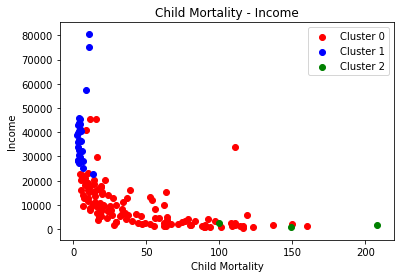

In [390]:
#Plotting Child Mortality vs Income - Scatter plot

plt.scatter(h_cluster0['child_mort'],h_cluster0['income'],c='red',label='Cluster 0')
plt.scatter(h_cluster1['child_mort'],h_cluster1['income'],c='blue',label='Cluster 1')
plt.scatter(h_cluster2['child_mort'],h_cluster2['income'],c='green',label='Cluster 2')
plt.xlabel("Child Mortality")
plt.ylabel("Income")
plt.title('Child Mortality - Income')
plt.legend(loc='upper right')
plt.show()

#### As we can interpret from both of the scatter plot that</BR>
<li>Lower the GDP of the Country Higher is the Child Mortality</li>
<li>Lower the Income of the Country Higher is the Child Mortality</li>

In [391]:
#Printing all countries which needs more attention by the NGO
print('There are {} countries which needs more attention by the NGO \nThey are as follows-\n'.format(h_cluster0.shape[0]))
h_cluster0['country']

There are 127 countries which needs more attention by the NGO 
They are as follows-



0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 127, dtype: object

### The 5 countries that are in the direst need of aid are :-</br>
##### (Complete Linkage)

In [449]:
h_cluster0_sort_child_mort_GDP=h_cluster0.sort_values(['child_mort','gdpp'],ascending=(False,True))
print(h_cluster0_sort_child_mort_GDP['country'].head())

132    Sierra Leone
32             Chad
97             Mali
112           Niger
3            Angola
Name: country, dtype: object


## Hierarchical clustering- Single Linkage

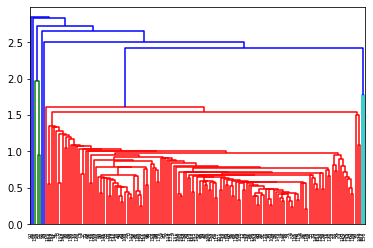

In [394]:
#Plotting the dendogram with complete Linkage
merging=linkage(df_scaled,method='single')
dendrogram(merging)
plt.show()

In [435]:
clusterCut=list(cut_tree(merging,n_clusters=3).reshape(-1,))

In [436]:
#Adding Cluster label to dataset
df_with_hierarchy_single_cluster=df2
df_with_hierarchy_single_cluster['cluster']=clusterCut

In [437]:
df_with_hierarchy_single_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


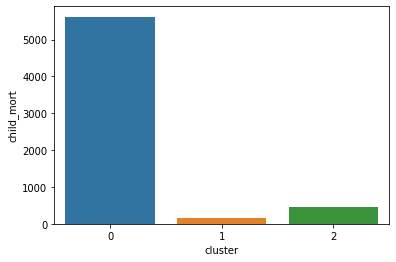

In [438]:
#Plotting the Cluster of countries with respect to child mortality 
sns.barplot(x="cluster",y="child_mort",data=df_with_hierarchy_single_cluster,estimator=sum,ci=None)

### The 5 countries that are in the direst need of aid are :-</br>
##### (Single Linkage)

In [451]:
h_s_cluster0=df_with_hierarchy_single_cluster[df_with_hierarchy_single_cluster['cluster']==0]
h_s_cluster0_sorted_childmor_gdp=h_s_cluster0.sort_values(['child_mort','gdpp'],ascending=(False,True))
print(h_s_cluster0_sorted_childmor_gdp['country'].head())

132    Sierra Leone
32             Chad
97             Mali
112           Niger
3            Angola
Name: country, dtype: object


# Final List of 5 countries that are in the direst need of aid are :-</br>
<li>Sierra Leone</li> 
<li>Chad </li>
<li>Mali </li>
<li>Niger</li>
<li>Central African Republic</li>


# Thank You!